In [76]:
import datetime

In [77]:
import nltk
import string

In [78]:
import pandas as pd
import numpy as np

In [86]:
from sklearn.metrics import confusion_matrix

In [91]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [88]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [5]:
from collections import Counter

In [6]:
from imblearn.under_sampling import RandomUnderSampler

In [7]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLP Pipeline 

![](images/pipeline-walkthrough1.png)

Below is a to do list when converting text into vector form: 

**Clean text and Create a Bag of Words (BoW)**
>1. Lowercase the text
2. Tokenize 
3. Strip out punctuation or undesirable text
4. Remove Stopwords 
5. Stemming or Lemmatizing
6. Compute N-Grams
7. Use this to create BoW

**Vectorize BoW**
>8. Term Frequencies
9. Document Frequencies
10. TF-IDF
11. Normalize vectors

Let's go through both what each of these steps are and how to do them in python with the following corpus of comments about data science...
 

In [8]:
# function to vectorize the type_of_material series into a y target vector.

def vectorize_y_ser(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [9]:
#rate of correct predictions out of total predictions

def metrics_(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tn + fn + tp + fp)
    print(f'accuracy = {accuracy}')
    recall = (tp) / (tp + fn)
    print(f'recall = {recall}')
    precision = (tp) / (tp + fp)
    print(f'precision = {precision}')

In [10]:
#function that removes string.punctuation w/out the '?'
def punc_strip(string):
    my_lil_punc_string = '!"#$$%&\()*+,-./:;<=>@[\\]^_`{|}~'
    extras = '[\\',.“-”’!—:()?@]$;"–/#|&‘°\\…%<‐+¡«»_•*>›=€·■♦£💃🏽∙≠{}¿😂¥̇̃★§🇺🇸©！💣。^‑🔥😡″̀🚨⃣😤🌫`●🤭✓📖📹✋👀¢💔😞‒📲📺🎙￼😎↓❤️😘🎉🥂🦔🥩🐐🍑🤸🕳🌵⛽⚕🔊™†‾′̈״÷💜💛¨´💥☄́~‚⌚↑🏁🇰🇪🌎→🗣─‼◇😾🤷🏻♂✔💪®♪😱👍،¯⌘🌈🤩✨̊🤣−😉♥👏💩🤐💋🧓👮👴♀🥴🐎⚡🤔🙁×💯🚂🙏🏾่াং়ে্িু🍆💦🎥💌◾📱👋🏼؟🙂🚫❗🙄🛑🌧❄̶🤝；🤯🧵😹¶➡😏🔧✌➼◉🐱⚪̧̄➔😺😁🇬🇧👎🍺'
    punc_list = my_lil_punc_string + extras
    
    for char in string:
        if char in punc_list:  
            string = string.replace(char, "")
            
    return string

In [11]:
%%time
#import csv

_2019_data = pd.read_csv('data/capstone2_2019_final.csv', index_col='Unnamed: 0')

CPU times: user 1.14 s, sys: 165 ms, total: 1.3 s
Wall time: 1.32 s


In [12]:
%%time
_2019_df = _2019_data.copy()

CPU times: user 805 µs, sys: 62 µs, total: 867 µs
Wall time: 870 µs


In [13]:
_2019_df.shape

(30256, 2)

In [14]:
(_2019_df.iloc[0])

text                ', 'In 2019, here’s what we could do instead.'...
type_of_material                                                Op-Ed
Name: 0, dtype: object

In [15]:
text_nan = _2019_df.text.isna()

In [16]:
text_nan

0        False
1        False
2        False
3        False
4        False
         ...  
30251     True
30252    False
30253    False
30254    False
30255    False
Name: text, Length: 30256, dtype: bool

In [17]:
len(text_nan)

30256

In [18]:
(_2019_df.iloc[0])

text                ', 'In 2019, here’s what we could do instead.'...
type_of_material                                                Op-Ed
Name: 0, dtype: object

In [19]:
_2019_df.shape

(30256, 2)

In [20]:
drop_nan_2019_df = _2019_df[text_nan == False]

In [21]:
drop_nan_2019_df.shape

(28484, 2)

In [22]:
# sum(drop_nan_2019_df.type_of_material == "News")

# 1741

In [23]:
# sum(drop_nan_2019_df.type_of_material == "Op-Ed")

# 31

In [24]:
(drop_nan_2019_df.iloc[0])

text                ', 'In 2019, here’s what we could do instead.'...
type_of_material                                                Op-Ed
Name: 0, dtype: object

In [25]:
sum(drop_nan_2019_df.type_of_material == "News")

26472

In [26]:
sum(drop_nan_2019_df.type_of_material == "Op-Ed")

2012

In [27]:
_2019_df = drop_nan_2019_df

In [28]:
_2019_df.shape

(28484, 2)

In [29]:
#define X. X is currently pandas series of unsplit strings

X = _2019_df.text

In [30]:
#turn series into list...

corpus = list(X)

In [31]:
# define y as a series of op-ed or news

y = _2019_df.type_of_material

In [32]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y = vectorize_y_ser(y)

CPU times: user 10.8 ms, sys: 1.77 ms, total: 12.5 ms
Wall time: 11.5 ms


In [33]:
y.value_counts()

0    26472
1     2012
Name: type_of_material, dtype: int64

In [34]:
(corpus[0])

'\', \'In 2019, here’s what we could do instead.\', "In most Western states, that $1,380 you spent on your phone could buy half an acre of land. In the right conditions, that half acre could easily accommodate 150 trees. A single tree sequesters 48 pounds of carbon a year. It takes about 30 minutes for an amateur forester to plant a tree. If every American smartphone owner used that time and money to plant half an acre of trees, we would sequester about 886 million tons of carbon a year, enough to offset more than 10 percent of the country’s annual emissions. If you don\'t want to do the planting yourself, the National Forest Foundation says it could meet all of its planting goals if every smartphone user gave it just 60 cents.", \'A recent study of romantic relationships among college students in the journal Psychology of Popular Media Culture found that “smartphone dependency is significantly linked to relationship uncertainty” and that “partners’ perceived smartphone dependency pred

In [35]:
_2019_df.head()

,text,type_of_material
0,"', 'In 2019, here’s what we could do instead.'...",Op-Ed
1,"', 'Many years before, back in Russia, the two...",Op-Ed
2,"', 'At a critical moment in the film, just aft...",Op-Ed
3,"', 'No other country in the world symbolizes t...",Op-Ed
4,"', 'The cycle has to be reversed. In the Unite...",Op-Ed


# remove stop words

# stemming/lemmatization

In [36]:
snowball = SnowballStemmer('english')
#wordnet = WordNetLemmatizer()

In [37]:
%%time
def snowball_tokenize(doc):
    snowball = SnowballStemmer('english')
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs


In [38]:
test_token = snowball_tokenize(corpus[0])

# vectorizer

In [55]:
%%time
#create vectorizer

vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
                 strip_accents='ascii', 
                 lowercase=True, 
#                 preprocessor=None, 
                 tokenizer=snowball_tokenize, 
#                 analyzer='word', 
                 stop_words='english', 
#                 token_pattern='(?u)\b\w\w+\b', 
#                 ngram_range=(1, 1), 
                 max_df=0.90, 
                 min_df=0.10, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 9.14 ms, sys: 20.7 ms, total: 29.8 ms
Wall time: 29.9 ms


In [56]:
%%time
print(datetime.datetime.now())

X_snowball = vectorizer.fit_transform(corpus)

2020-12-04 13:58:30.259869
CPU times: user 8min 39s, sys: 4.82 s, total: 8min 44s
Wall time: 8min 49s


In [57]:
count_vectorizer = CountVectorizer(strip_accents='None',
                                   lowercase=True,
                                   tokenizer=snowball_tokenize,
                                   stop_words='english',
                                   max_features=None)

# balance classes

In [58]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_snowball, y)
print(sorted(Counter(y_resampled).items()))
print(rus)

[(0, 2012), (1, 2012)]
RandomUnderSampler(random_state=0)
CPU times: user 8.89 ms, sys: 3.12 ms, total: 12 ms
Wall time: 10.9 ms


# test, train, split

In [59]:
%%time
#test, train, split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

CPU times: user 4.68 ms, sys: 2 ms, total: 6.69 ms
Wall time: 4.65 ms


# random forest classifier

In [60]:
%%time
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

CPU times: user 345 ms, sys: 11.4 ms, total: 357 ms
Wall time: 358 ms


In [61]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()

In [68]:
tn, fp, fn, tp 

(452, 43, 40, 471)

In [62]:
metrics_(tn, fp, fn, tp)

accuracy = 0.9174950298210736
recall = 0.9217221135029354
precision = 0.9163424124513618


In [63]:
print(f'num_features = {rf_clf.n_features_}')
feat_names = vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_
print((feature_import.shape))
feature_import.shape
met = metrics_(tn, fp, fn, tp)
print(met)
print(f'vectorizer = {vectorizer}')

num_features = 747
(747,)
accuracy = 0.9174950298210736
recall = 0.9217221135029354
precision = 0.9163424124513618
None
vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.1, stop_words='english',
                strip_accents='ascii',
                tokenizer=<function snowball_tokenize at 0x7f9fe90644d0>)


2020-12-04 15:16:55.553846
CPU times: user 49.5 ms, sys: 2.94 ms, total: 52.4 ms
Wall time: 52.5 ms


Text(0.5, 0, 'Average contribution to the reduction in variance')

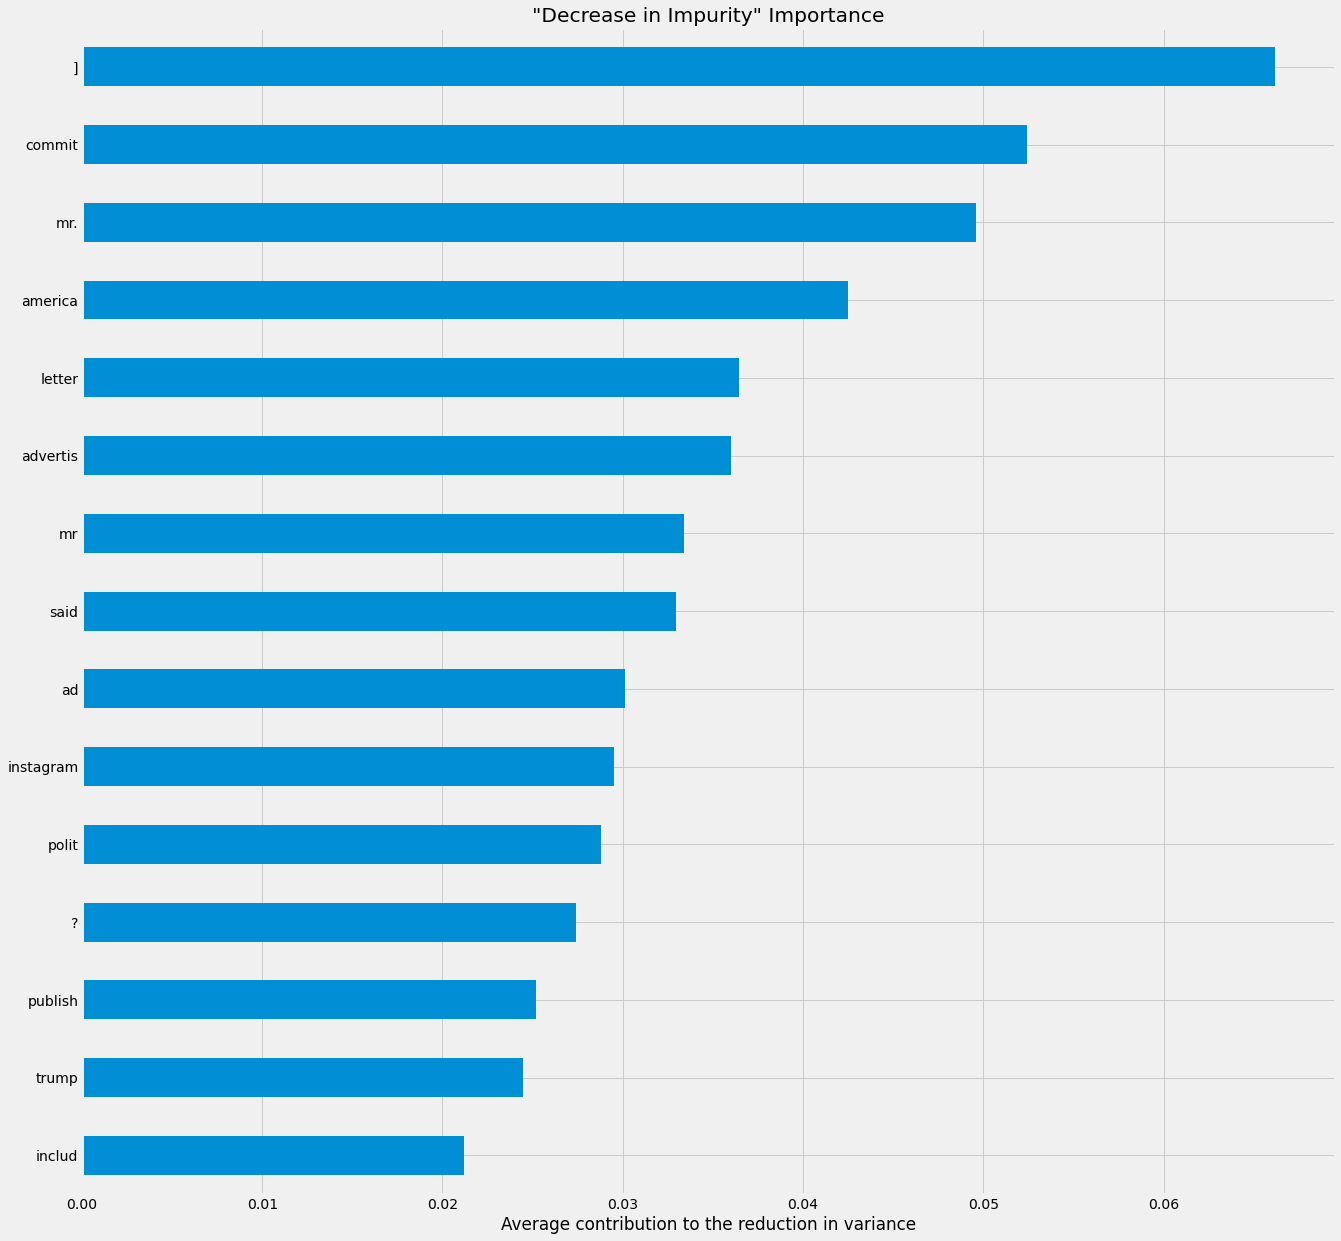

In [92]:
%%time
print(datetime.datetime.now())
feat_scores = pd.Series(feature_import,
                           index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-15:].plot(kind='barh', figsize=(20,20))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance');

In [65]:
%%time
print(datetime.datetime.now())
r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feat_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

2020-12-04 14:07:20.468548
]       0.054 +/- 0.007
advertis0.021 +/- 0.005
said    0.016 +/- 0.004
commit  0.008 +/- 0.003
CPU times: user 5min 10s, sys: 4.15 s, total: 5min 14s
Wall time: 5min 18s


In [66]:
feat_scores[-60:]

chief         0.002691
music         0.002729
republican    0.003177
presid        0.003412
turn          0.003508
power         0.003726
accord        0.003836
schedul       0.003850
film          0.004019
;             0.004184
week          0.004443
american      0.004471
understand    0.004607
isnt          0.004920
offici        0.005189
request       0.005336
team          0.005820
friday        0.006442
onli          0.006715
think         0.007135
spokesman     0.007201
ani           0.007627
[             0.007640
interview     0.008291
human         0.008680
)             0.008715
facebook      0.009416
social        0.009561
comment       0.010136
today         0.010170
monday        0.010174
sever         0.011854
:             0.011920
(             0.012055
fact          0.012796
email         0.013635
wednesday     0.013803
ms            0.015094
director      0.016126
hear          0.019149
whi           0.019616
statement     0.019732
tuesday       0.020127
ms.        

In [81]:
len(corpus)

28484

Text(0.5, 0, 'Predicted Label')

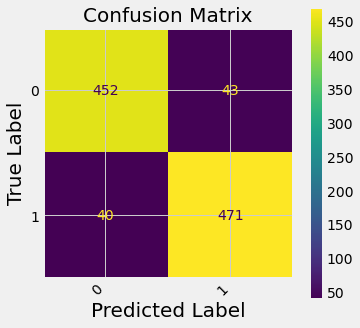

In [93]:
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(rf_clf, X_test, y_test, ax=ax)
plt.xticks(rotation = 45, ha="right")
plt.title('Confusion Matrix', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
